# Computing in a Global Society 

## Analysis of Group B data

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

### Extracting Pickles

In [2]:
directory = './material/right_arm_old_model/'
with open(directory+'df_recorded.pkl', 'rb') as f:
    df_recorded_right_old = pickle.load(f)
with open(directory+'df_supposed.pkl', 'rb') as f:
    df_supposed_right_old = pickle.load(f)
with open(directory+'results_df.pkl', 'rb') as f:
    results_df_right_old = pickle.load(f)

directory = './material/right_arm_new_model/'
with open(directory+'df_recorded.pkl', 'rb') as f:
    df_recorded_right_new = pickle.load(f)
with open(directory+'df_supposed.pkl', 'rb') as f:
    df_supposed_right_new = pickle.load(f)
with open(directory+'results_df.pkl', 'rb') as f:
    results_df_right_new = pickle.load(f)

directory = './material/left_arm_old_model/'
with open(directory+'df_recorded.pkl', 'rb') as f:
    df_recorded_left_old = pickle.load(f)
with open(directory+'df_supposed.pkl', 'rb') as f:
    df_supposed_left_old = pickle.load(f)
with open(directory+'results_df.pkl', 'rb') as f:
    results_df_right_old = pickle.load(f)

directory = './material/left_arm_new_model/'
with open(directory+'df_recorded.pkl', 'rb') as f:
    df_recorded_left_new = pickle.load(f)
with open(directory+'df_supposed.pkl', 'rb') as f:
    df_supposed_left_new = pickle.load(f)
with open(directory+'results_df.pkl', 'rb') as f:
    results_df_right_new = pickle.load(f)

### Analysis of Accuracy Once a tip was detected


#### For right vessel

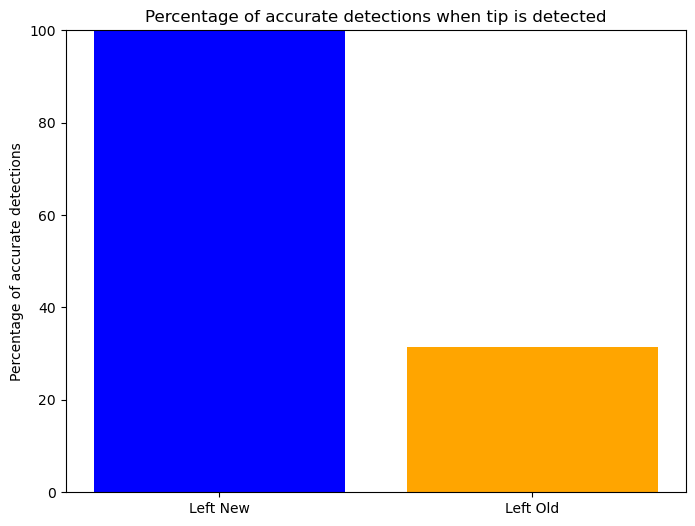

In [3]:
# Filter the DataFrames where tip_detected_recorded is 1
filtered_new = results_df_right_new[results_df_right_new['tip_detected_recorded'] == 1]
filtered_old = results_df_right_old[results_df_right_old['tip_detected_recorded'] == 1]

# Calculate the percentage of center_inside_box being True
percentage_new = filtered_new['center_inside_box'].mean() * 100
percentage_old = filtered_old['center_inside_box'].mean() * 100

# Prepare data for plotting
percentages = [percentage_new, percentage_old]
labels = ['Left New', 'Left Old']

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=['blue', 'orange'])
plt.ylabel('Percentage of accurate detections')
plt.title('Percentage of accurate detections when tip is detected')
plt.ylim(0, 100)
plt.show()

#### For left vessel

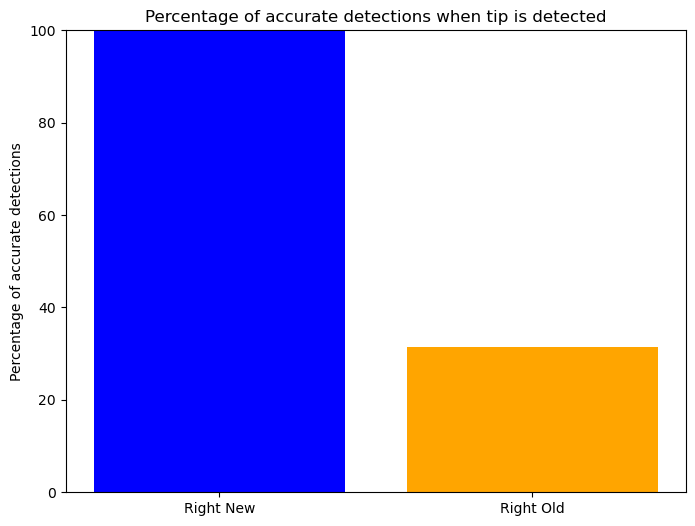

In [4]:
# Filter the DataFrames where tip_detected_recorded is 1
filtered_new = results_df_right_new[results_df_right_new['tip_detected_recorded'] == 1]
filtered_old = results_df_right_old[results_df_right_old['tip_detected_recorded'] == 1]

# Calculate the percentage of center_inside_box being True
percentage_new = filtered_new['center_inside_box'].mean() * 100
percentage_old = filtered_old['center_inside_box'].mean() * 100

# Prepare data for plotting
percentages = [percentage_new, percentage_old]
labels = ['Right New', 'Right Old']

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=['blue', 'orange'])
plt.ylabel('Percentage of accurate detections')
plt.title('Percentage of accurate detections when tip is detected')
plt.ylim(0, 100)
plt.show()

### Analysis of the average confidence in each arm

#### Merge dataframes for left vessel 

In [5]:
# Select the required columns from each DataFrame
df_recorded_selected = df_recorded_left_new[['frame_number', 'x_coordinate', 'y_coordinate', 'tip_detected', 'confidence']]
df_supposed_selected = df_supposed_left_new[['frame_number', 'x_coordinate', 'y_coordinate', 'width', 'height']]

# Merge the DataFrames on 'frame_number'
new_left_merged_df = pd.merge(df_recorded_selected, df_supposed_selected, on='frame_number', how='inner', suffixes=('_recorded', '_supposed'))

# Select the required columns from each DataFrame
df_recorded_selected = df_recorded_left_old[['frame_number', 'x_coordinate', 'y_coordinate', 'tip_detected', 'confidence']]
df_supposed_selected = df_supposed_left_old[['frame_number', 'x_coordinate', 'y_coordinate', 'width', 'height']]

# Merge the DataFrames on 'frame_number'
old_left_merged_df = pd.merge(df_recorded_selected, df_supposed_selected, on='frame_number', how='inner', suffixes=('_recorded', '_supposed'))


#### Merge dataframes for right vessel

In [6]:
# Select the required columns from each DataFrame
df_recorded_selected = df_recorded_right_new[['frame_number', 'x_coordinate', 'y_coordinate', 'tip_detected', 'confidence']]
df_supposed_selected = df_supposed_right_new[['frame_number', 'x_coordinate', 'y_coordinate', 'width', 'height']]

# Merge the DataFrames on 'frame_number'
new_right_merged_df = pd.merge(df_recorded_selected, df_supposed_selected, on='frame_number', how='inner', suffixes=('_recorded', '_supposed'))

# Select the required columns from each DataFrame
df_recorded_selected = df_recorded_right_old[['frame_number', 'x_coordinate', 'y_coordinate', 'tip_detected', 'confidence']]
df_supposed_selected = df_supposed_right_old[['frame_number', 'x_coordinate', 'y_coordinate', 'width', 'height']]

# Merge the DataFrames on 'frame_number'
old_right_merged_df = pd.merge(df_recorded_selected, df_supposed_selected, on='frame_number', how='inner', suffixes=('_recorded', '_supposed'))

### Filter dataframe and generate plots for left and right vessel

C:\Users\yanni\AppData\Local\Temp\ipykernel_20252\3789089471.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_left_filtered_df = new_left_merged_df[old_left_merged_df.apply(is_inside_box, axis=1)]
C:\Users\yanni\AppData\Local\Temp\ipykernel_20252\3789089471.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_right_filtered_df = new_right_merged_df[old_right_merged_df.apply(is_inside_box, axis=1)]


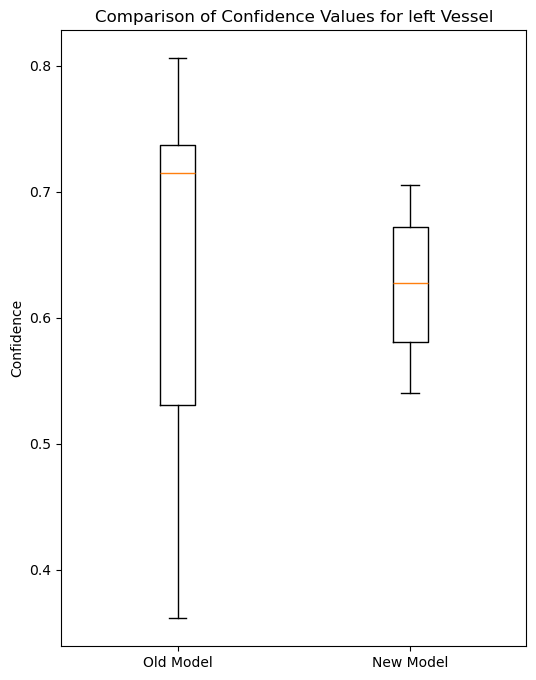

In [7]:
# Define a function to check if a point is inside the bounding box
def is_inside_box(row):
    x_inside = (row['x_coordinate_recorded'] >= row['x_coordinate_supposed']) and \
               (row['x_coordinate_recorded'] <= row['x_coordinate_supposed'] + row['width'])
    y_inside = (row['y_coordinate_recorded'] >= row['y_coordinate_supposed']) and \
               (row['y_coordinate_recorded'] <= row['y_coordinate_supposed'] + row['height'])
    return x_inside and y_inside

# Apply the function to filter the DataFrame for left side
old_left_filtered_df = old_left_merged_df[old_left_merged_df.apply(is_inside_box, axis=1)]
new_left_filtered_df = new_left_merged_df[old_left_merged_df.apply(is_inside_box, axis=1)]

# Apply the function to filter the DataFrame for right side
old_right_filtered_df = old_right_merged_df[old_right_merged_df.apply(is_inside_box, axis=1)]
new_right_filtered_df = new_right_merged_df[old_right_merged_df.apply(is_inside_box, axis=1)]


# Combine confidence values from both DataFrames
combined_confidence_left = [old_left_filtered_df['confidence'], new_left_filtered_df['confidence']]
combined_confidence_right = [old_right_filtered_df['confidence'], new_right_filtered_df['confidence']]


# Create a figure and axes
fig, ax = plt.subplots(figsize=(6, 8))

# Create boxplots for combined data
ax.boxplot(combined_confidence_left, vert=True)

# Set titles and labels
ax.set_title('Comparison of Confidence Values for left Vessel')
ax.set_xticklabels(['Old Model', 'New Model'])
ax.set_ylabel('Confidence')



plt.show()

Text(0, 0.5, 'Confidence')

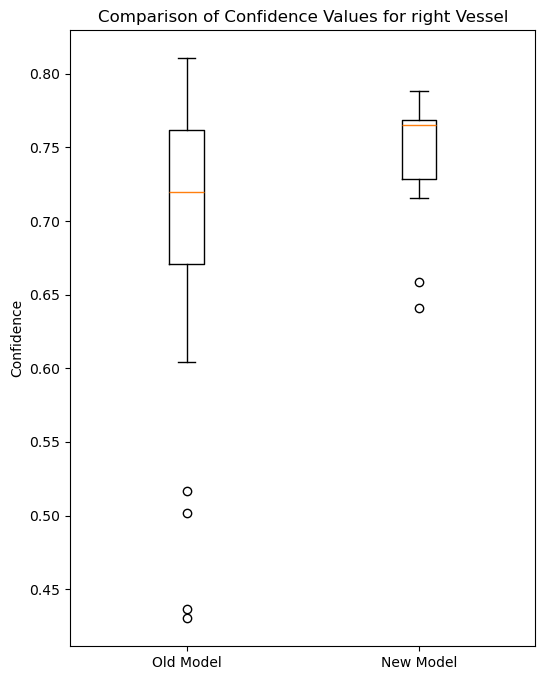

In [8]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(6, 8))

# Create boxplots for combined data
ax.boxplot(combined_confidence_right, vert=True)

# Set titles and labels
ax.set_title('Comparison of Confidence Values for right Vessel')
ax.set_xticklabels(['Old Model', 'New Model'])
ax.set_ylabel('Confidence')

### Data for tables

In [9]:
print('Median old right: '+str(old_right_filtered_df['confidence'].median()))
print('Average old right: '+str(old_right_filtered_df['confidence'].mean()))
print('Standard deviation old right: '+str(old_right_filtered_df['confidence'].std()))
print("-------------------")
print('Median new right: '+str(new_right_filtered_df['confidence'].median()))
print('Average new right: '+str(new_right_filtered_df['confidence'].mean()))
print('Standard deviation new right: '+str(new_right_filtered_df['confidence'].std()))

Median old right: 0.719853
Average old right: 0.6828623809523809
Standard deviation old right: 0.11688901306772857
-------------------
Median new right: 0.764964
Average new right: 0.7438665384615385
Standard deviation new right: 0.046440738085606455


In [10]:
print('Median new left: '+str(new_left_filtered_df['confidence'].median()))
print('Average new left: '+str(new_left_filtered_df['confidence'].mean()))
print('Standard deviation new left: '+str(new_left_filtered_df['confidence'].std()))
print('-----------------')
print('Median old left: '+str(old_left_filtered_df['confidence'].median()))
print('Average old left: '+str(old_left_filtered_df['confidence'].mean()))
print('Standard deviation old left: '+str(old_left_filtered_df['confidence'].std()))

Median new left: 0.627686
Average new left: 0.62520575
Standard deviation new left: 0.07278302241308295
-----------------
Median old left: 0.7152609999999999
Average old left: 0.6446968409090909
Standard deviation old left: 0.1373353768585541
